In [2]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("..")

import pandas as pd
import src.data_utils as u
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from random import sample

In [3]:
ones = u.read_ones('../data/train.csv')

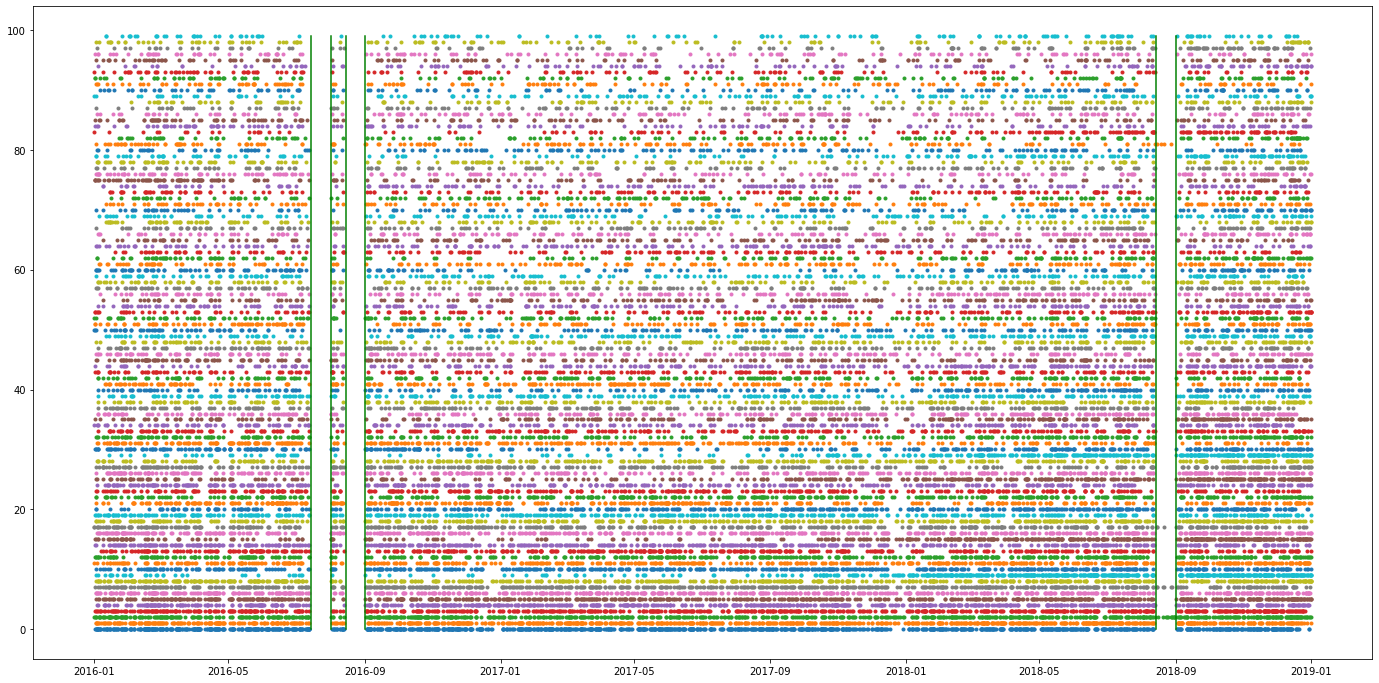

In [12]:
silent_ints = list(map(
lambda x: (pd.Timestamp(x[0]), pd.Timestamp(x[1])), 
    [
        ('2016-07-14 17:00', '2016-08-01 07:00'),
        ('2016-08-14 17:00', '2016-09-01 08:00'),
        ('2018-08-13 16:00', '2018-09-01 06:00'),
    ]
))


sids = [sid for (sid, _) in Counter(ones.sid).most_common()]
       
plt.figure(figsize=(24, 12))
for i, sid in enumerate(sids[:100]):
    tt = ones.time[ones.sid == sid]
    plt.plot(tt, i * np.ones(len(tt)), '.')
    
for (start, stop) in silent_ints:
    plt.plot([start, start], [0, i], 'g')
    plt.plot([stop, stop], [0, i], 'g')

plt.show()

In [7]:
train_full = pd.read_pickle('../data/train_NN.pkl')

In [11]:
train_full_ = u.proc_silent_intervals(train_full)

230124 records inside the silents periods were dropped.


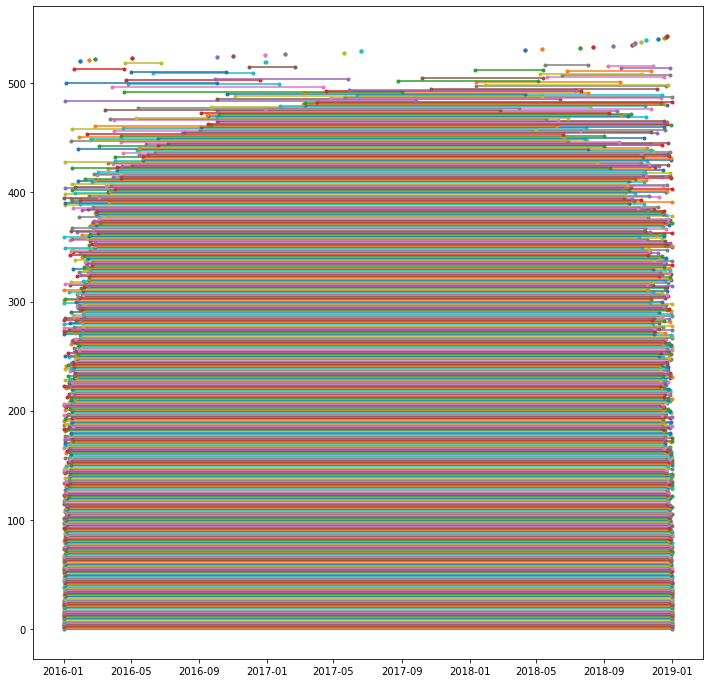

In [8]:
sids = ones.sid.unique()
tstart = []
tend = []

for i, sid in enumerate(sids):
    sample = ones[ones.sid == sid]
    sample = sample.sort_values(by=['time'])
    sample.reset_index(drop=True, inplace=True)
    tstart.append(sample.time[0])
    tend.append(sample.time[len(sample) - 1])
    

lifetime = [tstart[i] - tend[i] for i in range(len(tstart))]

keysort = lifetime
tstart = [x for y, x in sorted(zip(keysort, tstart))]
tend = [x for y, x in sorted(zip(keysort, tend))]
sids = [x for y, x in sorted(zip(keysort, sids))]


plt.figure(figsize=(12, 12))

k = 0
for i, sid in enumerate(sids[k:544]):
    plt.plot([tstart[k+i], tend[k+i]], [i, i], '.-')
    
plt.show()